# Portfolio Management

A portfolio is a collection of financial investments. Let's see how we construct, analyse and optimise portfolios with Python. Like with every notebook, this one starts with a list of imports.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

plt.style.use("ggplot")

## Portfolio Formation

Today we'll form what is known as a 1/N portfolio, with 5 stocks in it. The 1/N refers to the total investment being divided equally among the N stocks that comprise the portfolio - which is 5 in our case today.

Depending on what kind of data we have, portfolio formation can involve different steps.

### Exercise: Pull a Portfolio (Yahoo! Finance)

In this exercise, you'll pull Yahoo Finance data into panel data using yfinance.

Here is an example of how we could join together data from multiple CSV files. Can you adapt this code to instead join together data pulled directly from Yahoo Finance?

```python
tickers = ["TSLA", "MSFT", "AMZN", "META", "NVDA"]
groups = []

for ticker in tickers:
    data = pd.read_csv(ticker + "_2020.csv")
    df.columns = df.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

multi_df = pd.concat(data)
multi_df
```

Try it out in the code cell below:

In [ ]:
tickers = ["TSLA", "MSFT", "AMZN", "META", "NVDA"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start = "2020-01-01", end = "2020-12-31", auto_adjust = False)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

multi_df = pd.concat(groups)
multi_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,TSLA,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,TSLA,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,TSLA,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,TSLA,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...,...
2020-12-23,NVDA,12.974221,13.009250,13.275000,13.005000,13.256000,179144000
2020-12-24,NVDA,12.958763,12.993750,13.132500,12.938750,13.037250,97884000
2020-12-28,NVDA,12.865267,12.900000,13.062500,12.763250,13.062500,212564000


#### Multi-Stock Time Series Data (CRSP)

Maybe instead of Yahoo! Finance, you took advantage of the [College WRDS access](https://www.imperial.ac.uk/admin-services/library/subject-support/business/crsp/), or obtained a CSV with your data in some other way.

Let's work with our panel data as before.

In [11]:
df = pd.read_csv("data/top_six_2020_2025.csv", dayfirst=True)
df

,DlyCalDt,Ticker,DlyClose,DlyHigh,DlyLow,DlyOpen,DlyVolume
0,02/01/2020,AAPL,72.620834,72.681281,71.373211,71.627084,135480400
1,03/01/2020,AAPL,71.914818,72.676447,71.689957,71.847118,146322800
2,06/01/2020,AAPL,72.487839,72.526526,70.783241,71.034702,118387200
3,07/01/2020,AAPL,72.146927,72.753808,71.926900,72.497514,108872000
4,08/01/2020,AAPL,73.307503,73.609737,71.849525,71.849525,132079200
...,...,...,...,...,...,...,...
7537,23/12/2024,NVDA,139.657150,139.777134,135.107566,136.267463,176053500
7538,24/12/2024,NVDA,140.207108,141.886946,138.637245,139.987127,105157000
7539,26/12/2024,NVDA,139.917130,140.837058,137.717335,139.687155,116205600
7540,27/12/2024,NVDA,136.997391,139.007216,134.697615,138.537258,170582600


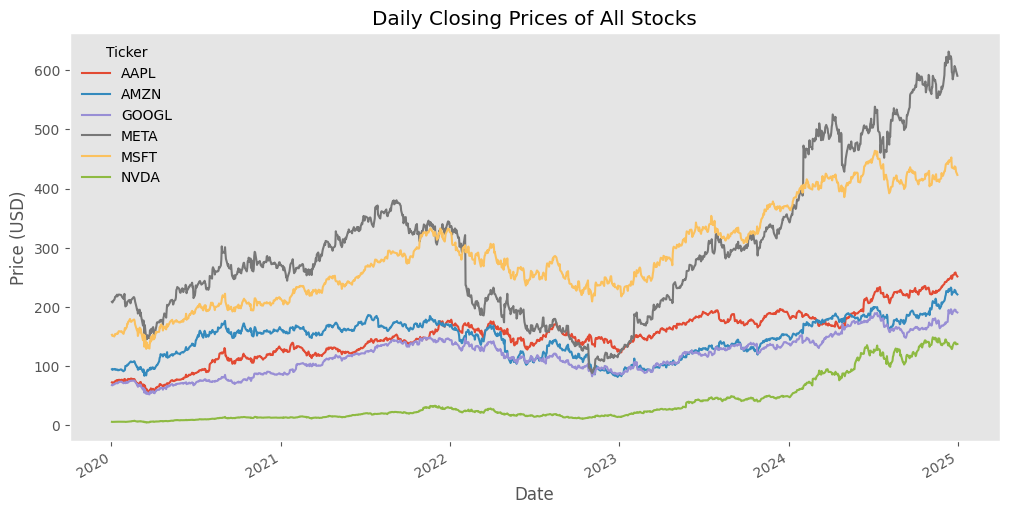

Ticker,AAPL,AMZN,GOOGL,META,MSFT
DlyCalDt,,,,,
2020-01-02,72.620834,94.900497,68.026016,208.795944,153.042328
2020-01-03,71.914818,93.748497,67.670143,207.691147,151.136658
2020-01-06,72.487839,95.143997,69.473846,211.602722,151.527298
2020-01-07,72.146927,95.343002,69.339645,212.060547,150.145737
2020-01-08,73.307503,94.598503,69.833183,214.210419,152.537277
...,...,...,...,...,...
2024-12-23,254.655716,225.059998,194.171051,599.316772,433.583038
2024-12-24,257.578674,229.050003,195.647552,607.209778,437.647369
2024-12-26,258.396667,227.050003,195.138763,602.813660,436.432068


In [17]:
df_pivot = df.pivot(index = "DlyCalDt", columns = "Ticker", values= "DlyClose")
df_pivot.index = pd.to_datetime(df_pivot.index, dayfirst=True)
df_pivot.sort_index(inplace = True)


plt.figure(figsize=(12, 6), facecolor='white', edgecolor='white', alpha = 0.0)
df_pivot.plot(ax=plt.gca())
plt.title("Daily Closing Prices of All Stocks")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Ticker", frameon=False)
plt.grid(True, which='major', linestyle='--', alpha=0.0)

plt.show()

portfolio = df_pivot.columns[:5]
df_pivot[portfolio]

In [ ]:
# THis to get all row and column
df_pivot.iloc[:, :]

# To get 5 columns and all rows
df = df_pivot.iloc[:, :5]
df

#To give weights
weights = np.ones(5) / 5
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

## Calculating Portfolio Daily Returns

First, let's determine the returns of our portfolio. We'll need to start with the daily returns of each stock, and then use `np.dot()` to mutliply each column of returns against its weight in the portfolio.

In [ ]:
returns = df.pct_change()
returns.dropna(inplace=True)
returns

port_return = np.dot(returns, weights)
port_return



array([-0.00896712,  0.01418525, -0.00229941, ..., -0.00363466,
       -0.01309293, -0.01192523], shape=(1256,))

## Annualising Returns and Volatility

To provide a broader picture of our portfolio's performance, let's calculate the annualised portfolio return and volatility. These are important metrics for evaluating and discussing portfolios. They are also used frequently in more advanced financial analyses.

In [ ]:
trading_days = 252

annualised_return = port_return.mean() * trading_days

p_volatility = port_return.std()
annualised_vol = p_volatility * np.sqrt(trading_days)

print(
    f"""
    Annualised return is {annualised_return}
    Annualised vol is {annualised_vol}
    """
)


    Annualised return is 0.2711079541094936
    Annualised vol is 0.2969380202368545
    


## Sharpe Ratio

The Sharpe Ratio is a measure that helps investors understand the risk-adjusted return of an investment. A high Sharpe ratio indicates that the portfolio's returns are higher for each unit of risk taken on. In contrast, a lower Sharpe Ratio indicates a less favorable risk-reward trade-off, with the potential for lower returns relative to the amount of risk being assumed.

The Sharpe Ratio is calculated using annualised portfolio returns, portfolio volatility (as the measure of risk), and the *risk-free rate*. The risk-free rate is often derived from the yield of a theoretically risk-free investment, typically a government bond. The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

### Exercise: Looking Sharpe

Calculate the Sharpe Ratio for our portfolio by applying the formula below.

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

- $R_p$ is our annualised portfolio return
- $R_f$ is the risk-free rate
- $\sigma_p$ is our annualised volatility


In [ ]:
rf = 0.0438
sharpe = (annualised_return - rf) / annualised_vol
print(f""" Sharpe ratio = {sharpe*100} """)

 Sharpe ratio = 76.55063973558521 
